In [ ]:
%pip install 'gymnasium[toy_text]'

On charge l'environnement Frozen Lake 8x8, qui se présente sous la forme d'une grille 8x8, dans laquelle on se déplace avec 4 actions (0: gauche, 1: bas, 2: droite, 3: haut). Cependant, le déplacement effectivement réalisé peut être perpendiculaire à celui attendu, car le lac est gelé et donc glissant: les transitions sont aléatoires. 

Les états (cases) sont numérotées de 0 à 63 selon l'expression suivante: ligne * 8 + colonne, où ligne et colonne vont de 0 à 7. La case en haut à gauche (0) est l'état de départ. La case en bas à droite (63) est l'objectif: une transition vers cet état donne un paiement de 1. Toutes les autres transitions donnent un paiement de 0. Lorsque cet état est atteint, on y reste et les paiements futurs sont nuls: on dit que l'épisode est terminé. Par ailleurs, il y certains états, notés H, qui sont des trous. Si on atteint un trou, on y reste et les paiements futurs sont nuls: l'épisode est terminé.

On pourra lire la documentation https://gymnasium.farama.org/environments/toy_text/frozen_lake/ pour plus d'informations.

In [2]:
import gymnasium as gym
env = gym.make("FrozenLake8x8-v1", render_mode="ansi", is_slippery=True)
env.reset()
print(env.render())


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG



Exécuter plusieurs fois la cellule suivante pour observer les états successifs.

In [3]:
s, r, terminated, truncated, info = env.step(1)
print(env.render())

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG



La fonction `env.step()` ci-dessus renvoie 5 valeurs: `s` contient le nouvel état, `r` le gain, `terminated` est un booléen qui indique si l'épisode est terminé, et `truncated` est un booléen qui indique si l'épisode a été terminé car trop long (par défaut, cet environnement termine l'épisode au bout de 200 étapes). La variable `info` contient des informations supplémentaires dont on ne se servira pas.

Lorsqu'un épisode est terminé, il faut en redémarrer un de la façon suivante.

In [4]:
s, info = env.reset()

**Question 1**: Écrire une fonction qui prend en argument une politique, et qui l'utilise pendant un certain nombre d'épisodes avant d'indiquer la proportion de réussites (d'épisodes qui ont atteint l'état 63). Une politique sera donnée sous la forme d'une fonction qui prend en argument un état (0 à 63) et qui renvoie une action (0 à 3).

In [5]:
def success_rate(pi,n_episodes=1000):
    env_ = gym.make("FrozenLake8x8-v1", render_mode="ansi", is_slippery=True)
    n_success = 0
    for episode in range(n_episodes):
        s, info = env_.reset()
        terminated = False
        truncated = False
        while not (terminated or truncated):
            a = pi(s)
            s, _, terminated, truncated, _ = env_.step(a)

        if s == 63:
            n_success += 1
    return n_success/n_episodes

**Question 2**: Implémenter le Q-learning avec une politique epsilon-gloutonne. A intervalles régulier au fil des itérations, utiliser la fonction ci-dessus pour évaluer le taux de succès de politique gloutonne courante. Tracer ensuite le taux de succès en fonction du nombre d'itérations. On pourra adapter certaines fonctions implémentées dans le TP précédent.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_action_greedy_policy(s, q, eps=0):
    # on pourra utiliser les fonction np.where(), np.random.binomial() , random.randint()
    if np.random.binomial(1, eps) == 1:
        return np.random.randint(low=0, high=4)
    else:
        Argmax = list(np.where(q[s]==q[s].max())[0]) 
        index = np.random.randint(low=0, high=len(Argmax))
        return Argmax[index]
    
def greedy_policy(q):
    def foo(s):
        return draw_action_greedy_policy(s,q,0)
    return foo

def q_mean(q_cumul, n_updates):
    return np.divide(q_cumul, n_updates, out=np.zeros_like(q_cumul), where=(n_updates != 0))

gamma = .99
eps = .2
n_iter = 1000000
env.reset()
q_cumul = np.zeros((64,4))
n_updates = np.zeros((64,4), dtype=int)
rates_for_plot = []
kk_for_plot = []
for k in range(n_iter):
    a = draw_action_greedy_policy(s, q_mean(q_cumul, n_updates), eps)
    s_, r, terminated, truncated, info = env.step(a)

    q_cumul[s,a] += r+gamma*q_mean(q_cumul,n_updates)[s_].max()
    n_updates[s,a] += 1

    s = s_

    if terminated or truncated:
        s, info = env.reset()

    if k % 10000 == 0:
        current_success_rate = success_rate(greedy_policy(q_mean(q_cumul,n_updates)))
        kk_for_plot.append(k) 
        rates_for_plot.append(current_success_rate)
        print(k, 'success rate', current_success_rate)
plt.plot(kk_for_plot, rates_for_plot)
plt.show()

0 success rate 0.001
10000 success rate 0.003
20000 success rate 0.003
30000 success rate 0.002
40000 success rate 0.001
50000 success rate 0.005
60000 success rate 0.054
70000 success rate 0.035
80000 success rate 0.051
90000 success rate 0.047
100000 success rate 0.042
110000 success rate 0.051
120000 success rate 0.042
130000 success rate 0.048
140000 success rate 0.046
150000 success rate 0.038
160000 success rate 0.046
170000 success rate 0.089
180000 success rate 0.106
190000 success rate 0.111
200000 success rate 0.103
210000 success rate 0.166
220000 success rate 0.135
230000 success rate 0.139
240000 success rate 0.146
250000 success rate 0.142
260000 success rate 0.17
270000 success rate 0.153
280000 success rate 0.153
290000 success rate 0.16
300000 success rate 0.135
310000 success rate 0.157
320000 success rate 0.143
330000 success rate 0.141
340000 success rate 0.151
350000 success rate 0.15
360000 success rate 0.158
370000 success rate 0.128
380000 success rate 0.135
390

**Question 3:** Essayer en faisant décroître epsilon au fil des itérations.

0 success rate 0.003
10000 success rate 0.003
20000 success rate 0.049
30000 success rate 0.059
40000 success rate 0.103
50000 success rate 0.117
60000 success rate 0.101
70000 success rate 0.159
80000 success rate 0.135
90000 success rate 0.145
100000 success rate 0.129
110000 success rate 0.138
120000 success rate 0.137
130000 success rate 0.127
140000 success rate 0.12
150000 success rate 0.144
160000 success rate 0.146
170000 success rate 0.161
180000 success rate 0.16
190000 success rate 0.159
200000 success rate 0.263
210000 success rate 0.255
220000 success rate 0.26
230000 success rate 0.257
240000 success rate 0.262
250000 success rate 0.372
260000 success rate 0.385
270000 success rate 0.349
280000 success rate 0.372
290000 success rate 0.386
300000 success rate 0.379
310000 success rate 0.368
320000 success rate 0.377
330000 success rate 0.362
340000 success rate 0.361
350000 success rate 0.347
360000 success rate 0.361
370000 success rate 0.381
380000 success rate 0.355
390

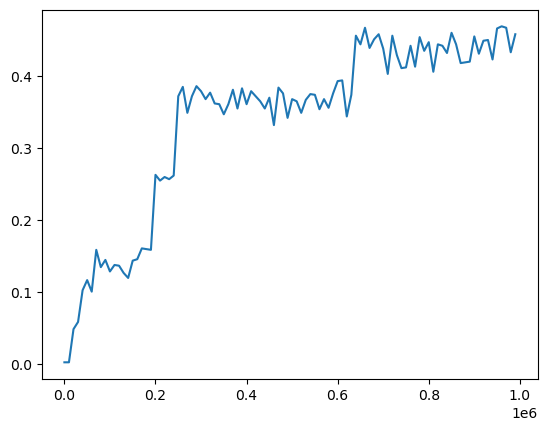

In [9]:
import math 

gamma = .99
n_iter = 1000000
env.reset()
q_cumul = np.zeros((64,4))
n_updates = np.zeros((64,4), dtype=int)
rates_for_plot = []
kk_for_plot = []
for k in range(n_iter):
    a = draw_action_greedy_policy(s, q_mean(q_cumul, n_updates), .3/math.sqrt(k/250000+1))
    s_, r, terminated, truncated, info = env.step(a)

    q_cumul[s,a] += r+gamma*q_mean(q_cumul,n_updates)[s_].max()
    n_updates[s,a] += 1

    s = s_

    if terminated or truncated:
        s, info = env.reset()

    if k % 10000 == 0:
        current_success_rate = success_rate(greedy_policy(q_mean(q_cumul,n_updates)))
        kk_for_plot.append(k) 
        rates_for_plot.append(current_success_rate)
        print(k, 'success rate', current_success_rate)
plt.plot(kk_for_plot, rates_for_plot)
plt.show()

**Question 4**: Mêmes questions pour SARSA (à T-étapes).